# Hierarchical Clustering

Hierarchical Clustering 是一種簡單但有效的聚類方法。其主要思路是將最相似的樣本合併成群，逐步擴大群組，最後根據需要決定分割成多少群組。

## 運作原理

層次聚類的主要流程如下：

1. **計算樣本間的距離**：計算所有樣本點之間的距離，通常使用歐基里德距離。
2. **合併最接近的樣本**：將距離最近的兩個樣本合併成一個群組。
3. **重複計算和合併**：重複步驟1和步驟2，直到所有樣本點都被合併成一個群組。
4. **切割群組**：根據距離或者其他準則，將群組切割成所需的數量。

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

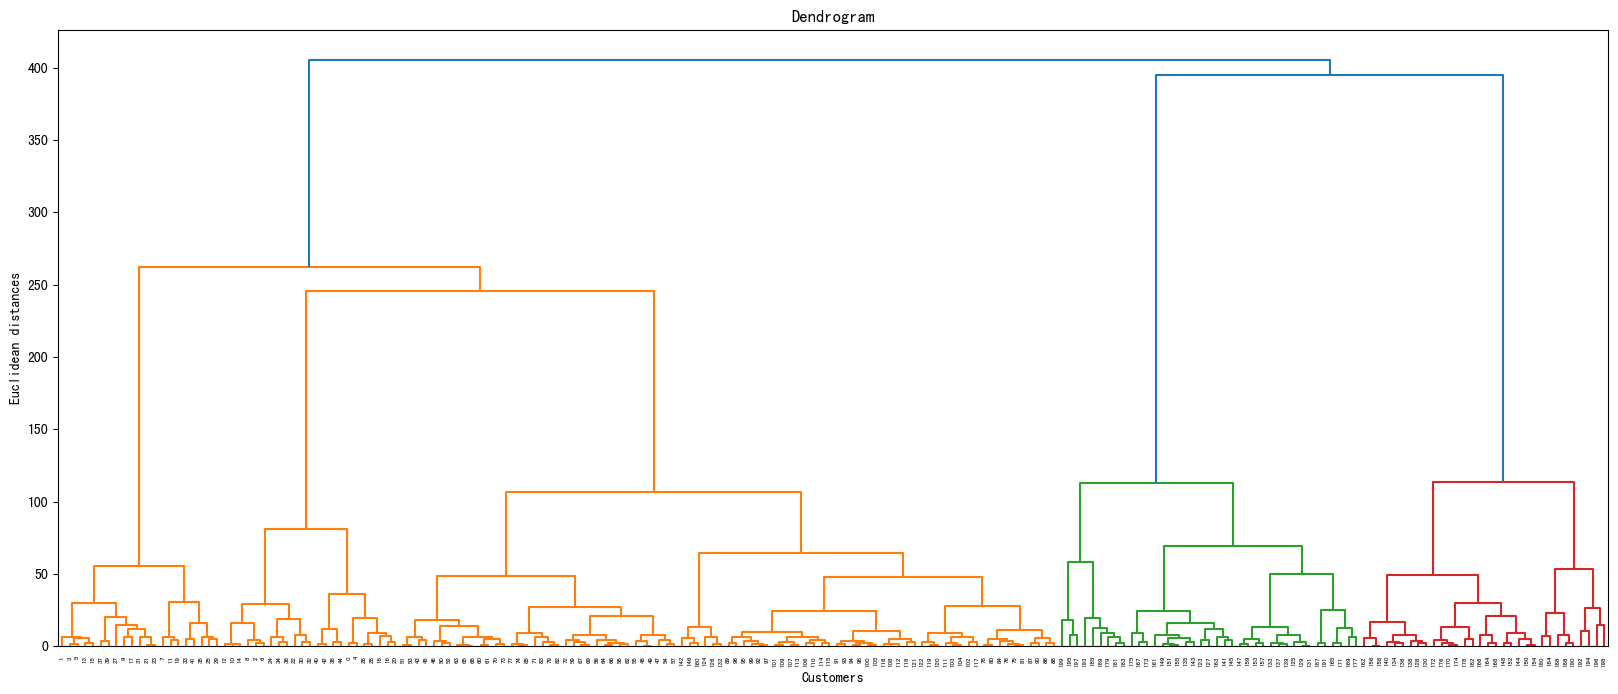

In [3]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



## Training the Hierarchical Clustering model on the dataset

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

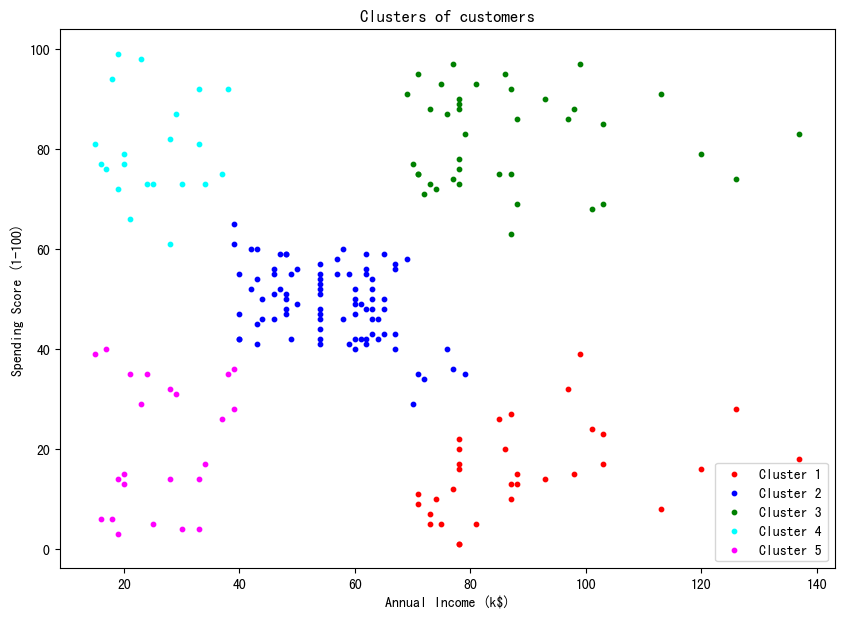

In [5]:
## 用 masking filter data (y_hc = ...)
## X 為 feature = nnual Income (k$) and Spending Score (1-100)

size = 10

# Scatter plot of the clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s=size, c=colors[i], label=f'Cluster {i+1}')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()





## 聚類之間距離的計算方式

當樣本點被合併成群組後，我們需要計算群組之間的距離。以下介紹幾種常見的群組間距離計算方法，並附上相關的公式和參數介紹：

### 1. Single Linkage (單鏈法)
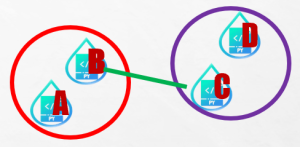
- **定義**：選擇兩個群組中距離最近的樣本點之間的距離作為群組間的距離。
- **公式**：
  $$
  d(A, B) = \min_{a \in A, b \in B} d(a, b)
  $$
  其中，$A$ 和 $B$ 是兩個群組，$a$ 和 $b$ 是群組中的樣本點，$d(a, b)$ 是樣本點之間的距離。
- **特點**：容易受單個樣本點的影響，可能會形成「鏈條」狀的聚類結果。

### 2. Maximum (Complete) Linkage (完全鏈接法)
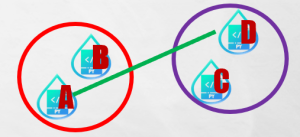
- **定義**：選擇兩個群組中距離最遠的樣本點之間的距離作為群組間的距離。
- **公式**：
  $$
  d(A, B) = \max_{a \in A, b \in B} d(a, b)
  $$
- **特點**：對離群點敏感，但能夠產生更緊密的聚類結果。

### 3. Average Linkage (平均鏈接法)
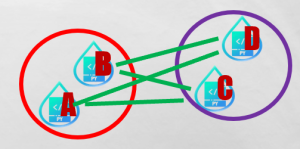
- **定義**：計算兩個群組中所有樣本點之間距離的平均值作為群組間的距離。
- **公式**：
  $$
  d(A, B) = \frac{1}{|A| \cdot |B|} \sum_{a \in A} \sum_{b \in B} d(a, b)
  $$
  其中，$|A|$ 和 $|B|$ 分別是群組 $A$ 和 $B$ 中樣本點的數量。
- **特點**：平衡了單鏈法和完全鏈接法的特點，較為穩定。

### 4. Ward's Method (沃德法)

主要思想: 群內樣本的樣本距離平方和較小，群與群之間的樣本距離平方和較大
做法: 兩群合併後，檢視各樣本點與合併後的群中心距離平方和 (簡單來說，在群與群合併的過程中，會選擇讓距離平方和增加最小的兩群進行合併)

- **定義**：合併兩個群組後，計算合併後群組內的樣本點與群組中心之間的距離平方和，選擇使得這個平方和增加最小的兩個群組進行合併。
- **公式**：
  $$
  d(A, B) = \sqrt{\frac{2|A||B|}{|A| + |B|}} \cdot ||\mu_A - \mu_B||
  $$
  其中，$\mu_A$ 和 $\mu_B$ 分別是群組 $A$ 和 $B$ 的均值向量。
- **特點**：優化了群內的緊密度，常用於減少聚類過程中的信息損失。



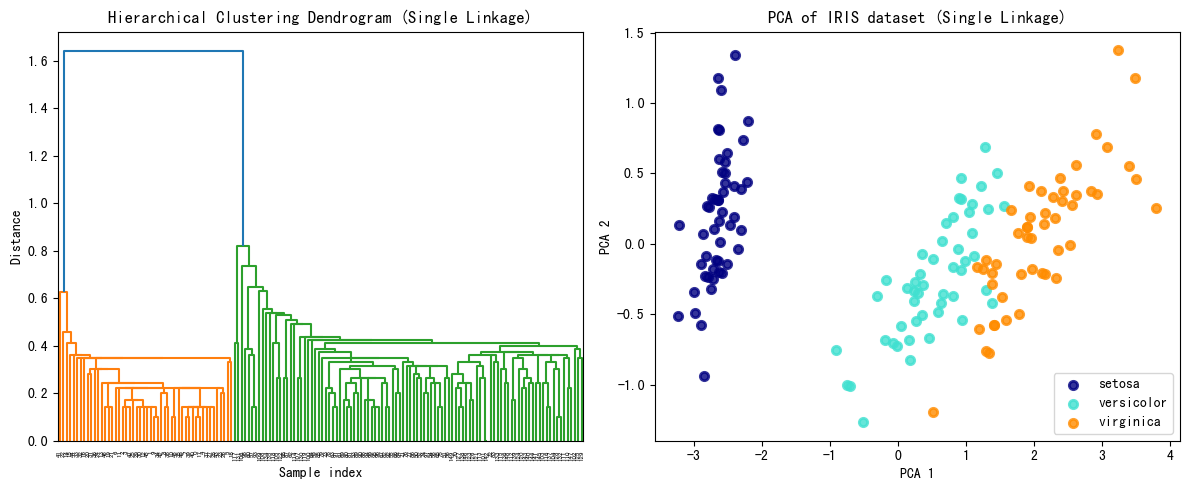

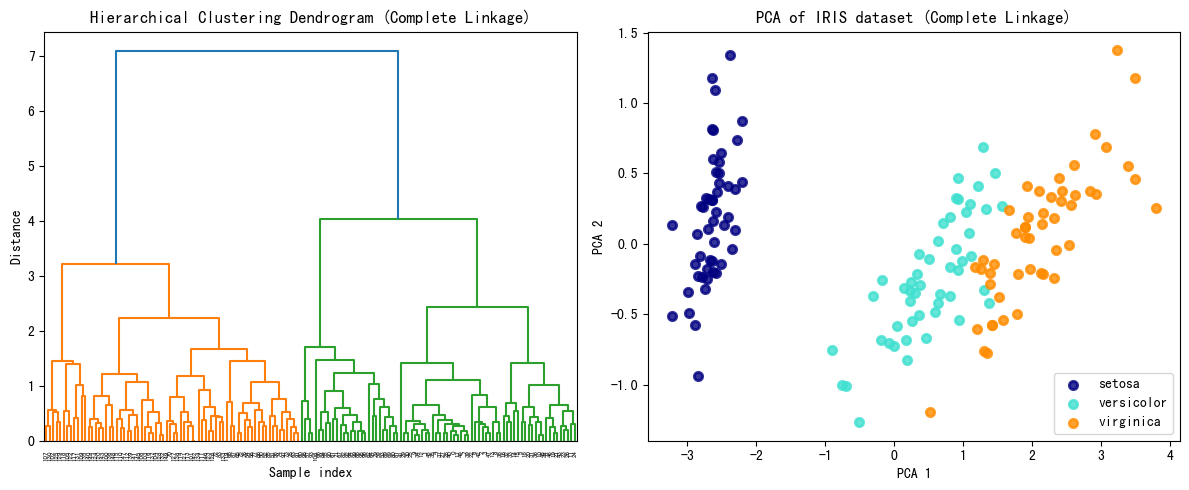

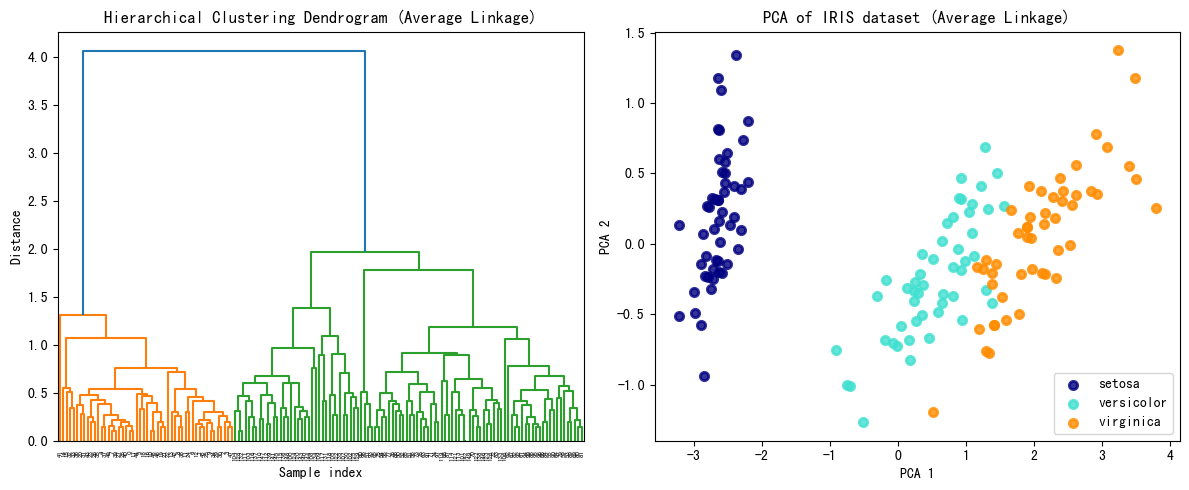

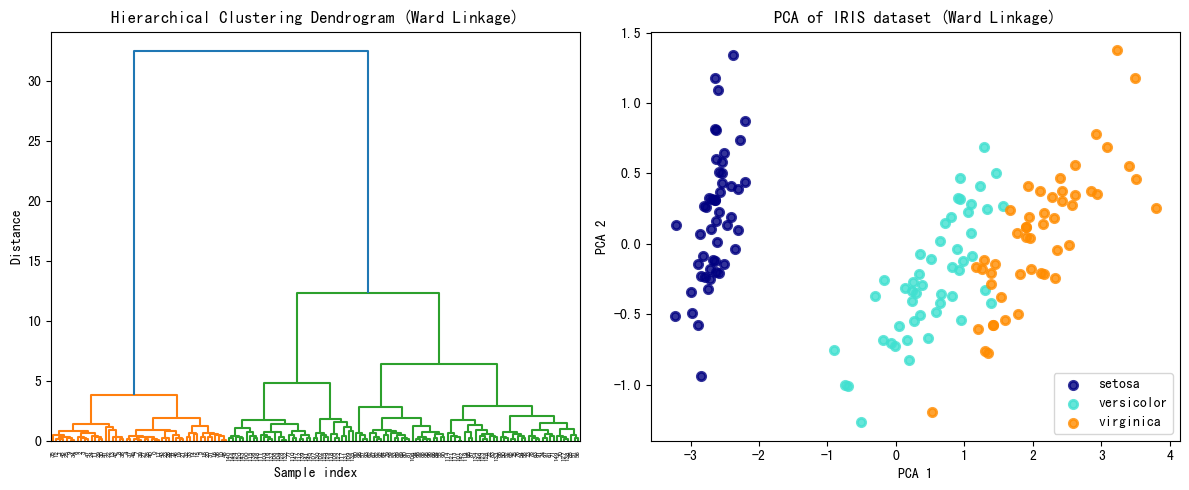

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 載入 iris 資料集
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# PCA 降維到 2 維
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# 定義 linkage 方法
methods = ['single', 'complete', 'average', 'ward']

# 繪製每種 linkage 方法的 dendrogram 和 PCA 散點圖
for method in methods:
    # 層次聚類
    Z = linkage(X, method=method)
    
    # 繪製 dendrogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    
    # 繪製 PCA 散點圖
    plt.subplot(1, 2, 2)
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=2,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(f'PCA of IRIS dataset ({method.capitalize()} Linkage)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    
    # 顯示圖表
    plt.tight_layout()
    plt.show()


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


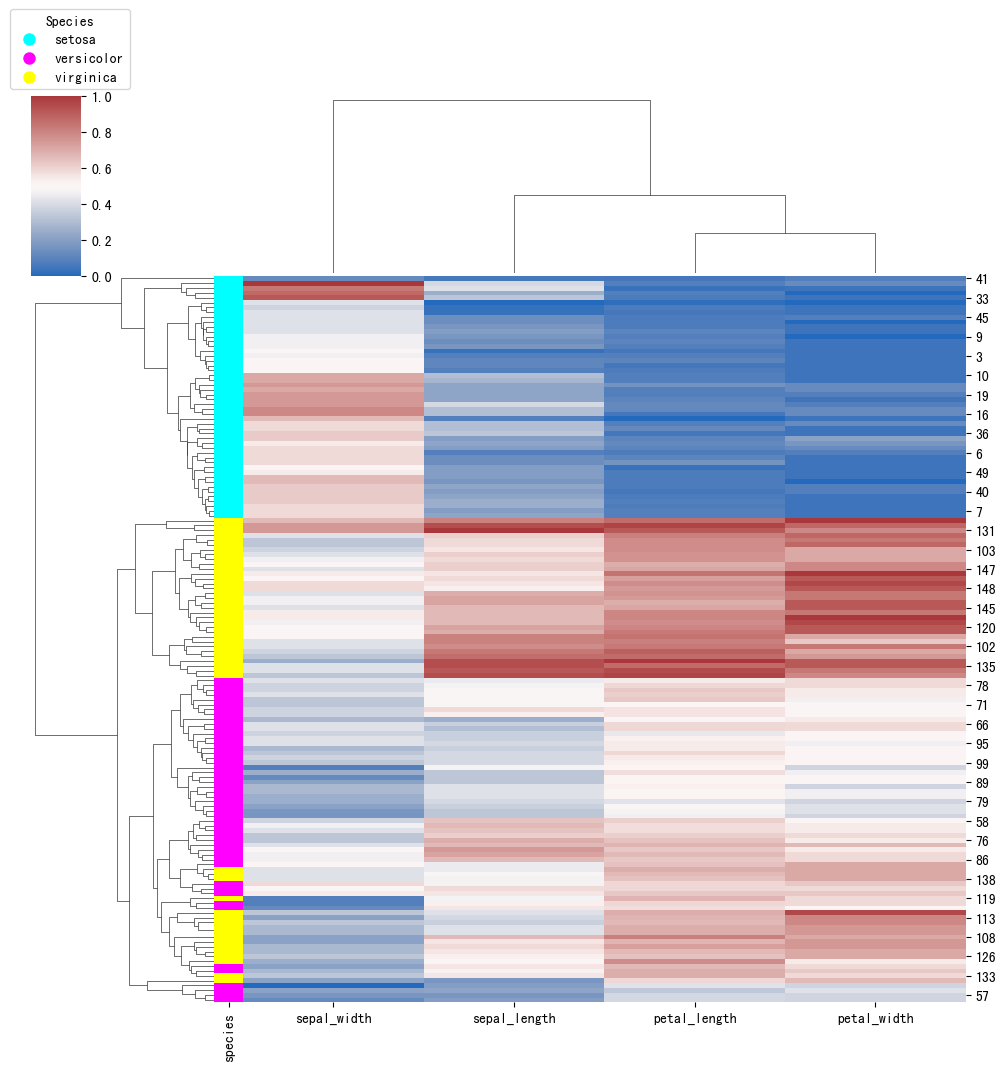

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())

# Prepare the data for clustering
# We will use only the numerical columns (sepal_length, sepal_width, petal_length, petal_width)
iris_data = iris.drop(columns=['species'])

# Standard heatmap with clustering
# sns.clustermap(iris_data, cmap="vlag")
# plt.show()

# Clustering heatmap with scaled rows and annotation
# Create an annotation dataframe for the species
annotation = pd.DataFrame({
    'species': iris['species']
}, index=iris_data.index)

# Create a color palette for the species annotation
species_palette = {'setosa': 'cyan', 'versicolor': 'magenta', 'virginica': 'yellow'}
row_colors = annotation['species'].map(species_palette)

# Draw the clustermap with annotation
g = sns.clustermap(iris_data, cmap="vlag", standard_scale=1, row_colors=row_colors)

# Create legend elements
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='setosa', markersize=10, markerfacecolor='cyan'),
    plt.Line2D([0], [0], marker='o', color='w', label='versicolor', markersize=10, markerfacecolor='magenta'),
    plt.Line2D([0], [0], marker='o', color='w', label='virginica', markersize=10, markerfacecolor='yellow')
]

# Place legend to the right of the heatmap
plt.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(2.1, 1), title='Species')
plt.show()

